In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k
from zipfile import ZipFile
import numpy as np
from PIL import Image
from io import BytesIO
import cv2 as cv

In [3]:
path="D:\\Work_folders\\datasets\\Advanced Computer Vision Project"

In [4]:
file_name="Part 1 - Train data - images.npy"

In [5]:
data=np.load(path+"\\"+file_name,allow_pickle=True)

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]


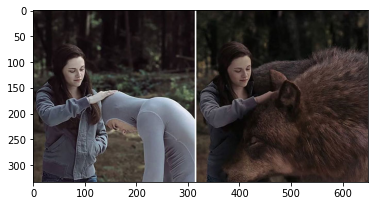

In [6]:
plt.imshow(data[0][0])
print(data[0][1])

In [7]:
data_img=[]
data_label=[]
for each in data:
    data_img.append(each[0])
    if len(each[1])>1:
        print(each[1])
        print("\n")
    data_label.append(each[1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]


[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.46956521739130436, 'y': 0.05}, {'x': 0.6065217391304348, 'y': 0.3333333333333333}], 'imageWidth': 460, 'imageHeight': 240}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.6282608695652174, 'y': 0.008333333333333333}, {'x': 0.7456521739130435, 'y': 0.30833333333333335}], 'imageWidth': 460, 'imageHeight': 240}]


[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465}, {'x': 0.6603448275862069, 'y': 0.3773006134969325}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.386

In [8]:
#Removing alpha channel from the images via Computer Vision Libraries
for i in range(len(data_img)):
    #print(data_img[i].shape)
    try:
        assert data_img[i].shape[2]!=3
        #print("Before",i)
        #print(data_img[i])
        #print("After")
        data_img[i] = cv.cvtColor(data_img[i], cv.COLOR_BGRA2BGR)
        #print(data_img[i])
    except:
        pass
 

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527}, {'x': 0.7692307692307693, 'y': 0.36182902584493043}], 'imageWidth': 1280, 'imageHeight': 697}]


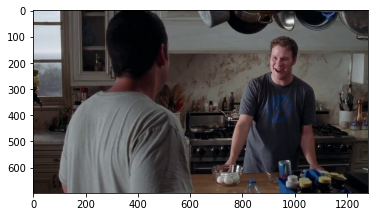

In [9]:
plt.imshow(data_img[1])
print(data_label[1])

In [10]:
from face_recognition import face_locations
face_locations(data_img[12])

ModuleNotFoundError: No module named 'face_recognition'

In [23]:
def show_image_bounding_test(image_data,label_data):
    import matplotlib.pyplot as plt
    from face_recognition import face_locations
    data_img=image_data
    data_label=label_data
    y=[]
    image_height = data_label[0]["imageHeight"]
    image_width=data_label[0]["imageWidth"]
    face_locations=face_locations(data_img,model="cnn")
    print(face_locations)
    no_faces=len(face_locations)
    fig,ax = plt.subplots()
    #print(type(ax))
    for each in face_locations:
        #region=data_label[each]["points"]
        region=face_locations
        x0 = int(each[0]) # Scale the BBox
        x1 = int(each[1])
        #print(x0,y0)

        y0 = int((each[2]))
        y1 = int((each[3]))
        #print(x1,y1)

        # Create a Rectangle patch
        rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
        y.append([x0,y0,x1,y1])
        #ax.imshow(data_img)

        # Add the patch to the Axes
        ax.add_patch(rect)
    ax.imshow(data_img)
    plt.show()
    return np.array(y)

In [ ]:
show_image_bounding_test(data_img[12],data_label[12])

In [10]:
print("The Total number of images in the data is : ",len(data_img))

The Total number of images in the data is :  409


In [11]:
def show_image_bounding(image_data,label_data):
    import matplotlib.pyplot as plt
    data_img=image_data
    data_label=label_data
    vectors
    image_height = data_label[0]["imageHeight"]
    image_width=data_label[0]["imageWidth"]
    no_faces=len(data_label)
    fig,ax = plt.subplots()
    print(type(ax))
    for each in range(no_faces):
        region=data_label[each]["points"]
        x0 = int(region[0]["x"] * image_width) # Scale the BBox
        y0 = int(region[0]["y"] * image_height)
        print(x0,y0)

        x1 = int((region[1]["x"]) * image_width)
        y1 = int((region[1]["y"]) * image_height)
        print(x1,y1)
        

        # Create a Rectangle patch
        rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
        
        ax.imshow(data_img)

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()
    return 

<class 'matplotlib.axes._subplots.AxesSubplot'>
138 354
863 1304
1002 753
1577 1658
2652 399
3337 1389
3382 994
3842 1682
3891 607
4588 1442


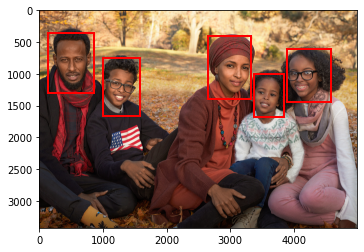

In [27]:
show_image_bounding(data_img[12],data_label[12])

Image Index :  10
<class 'matplotlib.axes._subplots.AxesSubplot'>
288 35
462 229


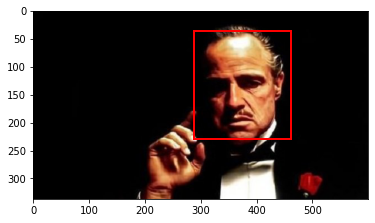

Image Index :  14
<class 'matplotlib.axes._subplots.AxesSubplot'>
1226 137
1389 356
1037 241
1195 400


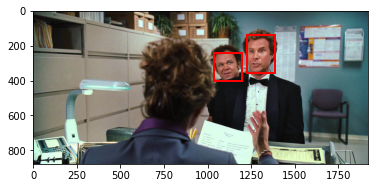

Image Index :  18
<class 'matplotlib.axes._subplots.AxesSubplot'>
256 22
324 113
290 361
386 452


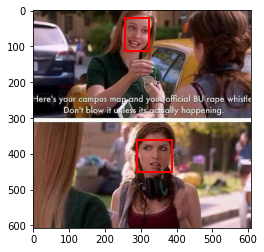

Image Index :  22
<class 'matplotlib.axes._subplots.AxesSubplot'>
415 77
472 144
58 55
136 117


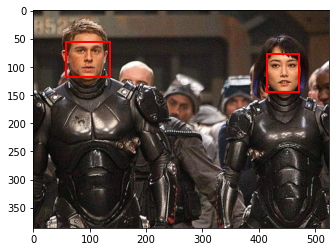

In [11]:
for i in range(10,25,4):
    print("Image Index : ",i)
    show_image_bounding(data_img[i],data_label[i])

In [15]:
import tensorflow
# patch tf1 into `utils.ops`
utils_ops.tensorflow = tf.compat.v1

# Patch the location of gfile
tensorflow.gfile = tf.io.gfile

NameError: name 'utils_ops' is not defined

In [16]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
	
    

In [17]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 

ModuleNotFoundError: No module named 'mtcnn'

In [17]:
import mtcnn
print(mtcnn.__version__)

ModuleNotFoundError: No module named 'mtcnn'

In [18]:
from mtcnn import MTCNN
import cv2

img = cv2.cvtColor(cv2.imread(data_img[1]), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detector.detect_faces(img)
[
    {
        'box': [277, 90, 48, 63],
        'keypoints':
        {
            'nose': (303, 131),
            'mouth_right': (313, 141),
            'right_eye': (314, 114),
            'left_eye': (291, 117),
            'mouth_left': (296, 143)
        },
        'confidence': 0.99851983785629272
    }
]

ModuleNotFoundError: No module named 'mtcnn'

In [14]:
!python -V

Python 3.8.8


In [19]:
import mtcnn

ModuleNotFoundError: No module named 'mtcnn'

In [ ]:
#filename = 'test1.jpg'
# load image from file
#pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(data_img[1])
# display faces on the original image
draw_image_with_boxes(data_img[1], faces)